# Clone Data sets from kaggle



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ibrahimashraf839","key":"f9a6edc2f6084988a8408d5d61e28b24"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                title                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  -----------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                    DAIGT V2 Train Dataset                29MB  2023-11-16 01:38:36           2952        249  1.0              
rishabhkarn/ipl-auction-2023                       IPL Auction 2023                       4KB  2023-12-24 10:45:03            604         25  0.9411765        
bhavikjikadara/car-price-prediction-dataset        Car Price Prediction Dataset           4KB  2023-12-23 07:07:54           1161         33  0.9411765        
thedevastator/global-video-game-sales-and-reviews  Global Video Game Sales and Reviews   56KB  2023-12-20 06:36:51           1143         30  1.0              
thedrcat/daigt-proper-train-dataset     

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 102MB/s]


In [ ]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
data_train = pd.read_csv('/content/train.csv')
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
data_test = pd.read_csv('/content/test.csv')
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# 2. Data Cleaning



In [ ]:
def data_info(data):
  cols = []
  d_types = []
  n_unique = []
  unique_val = []
  null = []
  for col in data.columns:
    cols.append(col)
    d_types.append(data[col].dtypes)
    unique_val.append(data[col].unique())
    n_unique.append(data[col].nunique())
    null.append(data[col].isnull().sum())
  return pd.DataFrame({'columns':cols,'Unique Value':unique_val,"no_Unique":n_unique,'Data Types':d_types ,'Nulls':null})




### 2.1 Cleaning Train Data




In [ ]:
numerical_data_train =pd.DataFrame(data_train.select_dtypes(include=[np.number]))

categorical_data_train =pd.DataFrame(data_train.select_dtypes(include=[np.object]))

<ipython-input-26-986e7e27cc6c>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_data_train =pd.DataFrame(data_train.select_dtypes(include=[np.object]))


#### 2.1.1 categotical data

In [ ]:
categorical_data_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
data_info(categorical_data_train)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[RL, RM, C (all), FV, RH]",5,object,0
1,Street,"[Pave, Grvl]",2,object,0
2,Alley,"[nan, Grvl, Pave]",2,object,1369
3,LotShape,"[Reg, IR1, IR2, IR3]",4,object,0
4,LandContour,"[Lvl, Bnk, Low, HLS]",4,object,0
5,Utilities,"[AllPub, NoSeWa]",2,object,0
6,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5,object,0
7,LandSlope,"[Gtl, Mod, Sev]",3,object,0
8,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,object,0
9,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,object,0


In [ ]:
categorical_data_train.drop(['Alley','MiscFeature', 'Fence', 'PoolQC','FireplaceQu','Functional','Utilities'],axis=1 ,inplace=True)

In [ ]:
data_info(categorical_data_train)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[RL, RM, C (all), FV, RH]",5,object,0
1,Street,"[Pave, Grvl]",2,object,0
2,LotShape,"[Reg, IR1, IR2, IR3]",4,object,0
3,LandContour,"[Lvl, Bnk, Low, HLS]",4,object,0
4,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5,object,0
5,LandSlope,"[Gtl, Mod, Sev]",3,object,0
6,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,object,0
7,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,object,0
8,Condition2,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...",8,object,0
9,BldgType,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",5,object,0


In [ ]:
categorical_data_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
categorical_data_train.drop('MasVnrType',axis=1, inplace=True)

In [ ]:
categorical_data_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
categorical_data_train['Electrical'].fillna(value='SBrkr')

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [ ]:
categorical_data_train.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [ ]:
categorical_data_train.dropna(axis=0, inplace=True)

In [ ]:
data_info(categorical_data_train)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[RL, RM, C (all), FV, RH]",5,object,0
1,Street,"[Pave, Grvl]",2,object,0
2,LotShape,"[Reg, IR1, IR2, IR3]",4,object,0
3,LandContour,"[Lvl, Bnk, Low, HLS]",4,object,0
4,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5,object,0
5,LandSlope,"[Gtl, Mod, Sev]",3,object,0
6,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,object,0
7,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,object,0
8,Condition2,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...",8,object,0
9,BldgType,"[1Fam, 2fmCon, TwnhsE, Duplex, Twnhs]",5,object,0


In [ ]:
categorical_data_train['PavedDrive'].value_counts()

Y    1265
N      54
P      27
Name: PavedDrive, dtype: int64

In [ ]:
categorical_data_train = categorical_data_train.loc[categorical_data_train['PavedDrive'] != 'P']


In [ ]:
from sklearn.preprocessing import LabelEncoder
# make for loop dueto label encoder it work only one coulmns
encoder = LabelEncoder()
for column in categorical_data_train.columns:
    categorical_data_train[column] = encoder.fit_transform(categorical_data_train[column])


<ipython-input-40-713bf541a2f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_train[column] = encoder.fit_transform(categorical_data_train[column])
<ipython-input-40-713bf541a2f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_train[column] = encoder.fit_transform(categorical_data_train[column])
<ipython-input-40-713bf541a2f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
data_info(categorical_data_train)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[3, 4, 0, 1, 2]",5,int64,0
1,Street,"[1, 0]",2,int64,0
2,LotShape,"[3, 0, 1, 2]",4,int64,0
3,LandContour,"[3, 0, 2, 1]",4,int64,0
4,LotConfig,"[4, 2, 0, 1, 3]",5,int64,0
5,LandSlope,"[0, 1, 2]",3,int64,0
6,Neighborhood,"[5, 24, 6, 15, 11, 21, 14, 17, 3, 19, 16, 12, ...",25,int64,0
7,Condition1,"[2, 1, 4, 0, 5, 8, 6, 3, 7]",9,int64,0
8,Condition2,"[2, 0, 7, 1, 4, 3, 6, 5]",8,int64,0
9,BldgType,"[0, 1, 4, 2, 3]",5,int64,0


#### 2.2 Numerical Data

In [ ]:
numerical_data_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
data_info(numerical_data_train)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,Id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1460,int64,0
1,MSSubClass,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15,int64,0
2,LotFrontage,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110,float64,259
3,LotArea,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",1073,int64,0
4,OverallQual,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]",10,int64,0
5,OverallCond,"[5, 8, 6, 7, 4, 2, 3, 9, 1]",9,int64,0
6,YearBuilt,"[2003, 1976, 2001, 1915, 2000, 1993, 2004, 197...",112,int64,0
7,YearRemodAdd,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...",61,int64,0
8,MasVnrArea,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",327,float64,8
9,BsmtFinSF1,"[706, 978, 486, 216, 655, 732, 1369, 859, 0, 8...",637,int64,0


In [ ]:
numerical_data_train.drop('Id',axis=1,inplace=True)

In [ ]:
numerical_data_train=numerical_data_train.fillna(value=numerical_data_train.mean())

In [ ]:
  numerical_data_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
data_train_conc = pd.concat([categorical_data_train, numerical_data_train], axis=1)


In [ ]:
data_train_conc.dropna(axis=0, inplace=True)


In [ ]:
data_train_conc

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3.0,1.0,3.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500
1,3.0,1.0,3.0,3.0,2.0,0.0,24.0,1.0,2.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,3.0,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,2.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,3.0,1.0,0.0,3.0,2.0,0.0,15.0,2.0,2.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,3.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,...,0,40,0,0,0,0,0,8,2007,175000
1456,3.0,1.0,3.0,3.0,4.0,0.0,14.0,2.0,2.0,0.0,...,349,0,0,0,0,0,0,2,2010,210000
1457,3.0,1.0,3.0,3.0,4.0,0.0,6.0,2.0,2.0,0.0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,3.0,1.0,3.0,3.0,4.0,0.0,12.0,2.0,2.0,0.0,...,366,0,112,0,0,0,0,4,2010,142125


### 2.2 Cleaning Test Data

In [ ]:
numerical_data_test =pd.DataFrame(data_test.select_dtypes(include=[np.number]))

categorical_data_test =pd.DataFrame(data_test.select_dtypes(include=[np.object]))

<ipython-input-50-cc243935b477>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_data_test =pd.DataFrame(data_test.select_dtypes(include=[np.object]))


#### 2.2.1 Categorical Data

In [ ]:
categorical_data_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [ ]:
data_info(categorical_data_test)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[RH, RL, RM, FV, C (all), nan]",5,object,4
1,Street,"[Pave, Grvl]",2,object,0
2,Alley,"[nan, Pave, Grvl]",2,object,1352
3,LotShape,"[Reg, IR1, IR2, IR3]",4,object,0
4,LandContour,"[Lvl, HLS, Bnk, Low]",4,object,0
5,Utilities,"[AllPub, nan]",1,object,2
6,LotConfig,"[Inside, Corner, FR2, CulDSac, FR3]",5,object,0
7,LandSlope,"[Gtl, Mod, Sev]",3,object,0
8,Neighborhood,"[NAmes, Gilbert, StoneBr, BrDale, NPkVill, Nri...",25,object,0
9,Condition1,"[Feedr, Norm, PosN, RRNe, Artery, RRNn, PosA, ...",9,object,0


In [ ]:
categorical_data_test.drop(['Alley','MiscFeature', 'Fence', 'PoolQC','FireplaceQu','MasVnrType','Functional','Utilities'],axis=1 ,inplace=True)

In [ ]:
categorical_data_test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [ ]:
categorical_data_test['MSZoning'].fillna(value='RL', inplace=True)
categorical_data_test['SaleType'].fillna(value='WD', inplace=True)
categorical_data_test['KitchenQual'].fillna(value='TA', inplace=True)
categorical_data_test['Exterior1st'].fillna(value='VinylSd', inplace=True)
categorical_data_test['Exterior2nd'].fillna(value='VinylSd', inplace=True)
categorical_data_test['KitchenQual'].fillna(value='TA', inplace=True)


In [ ]:
categorical_data_test.dropna(axis=0, inplace=True)

In [ ]:
data_info(categorical_data_test)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[RH, RL, RM, FV, C (all)]",5,object,0
1,Street,"[Pave, Grvl]",2,object,0
2,LotShape,"[Reg, IR1, IR2, IR3]",4,object,0
3,LandContour,"[Lvl, HLS, Bnk, Low]",4,object,0
4,LotConfig,"[Inside, Corner, FR2, CulDSac, FR3]",5,object,0
5,LandSlope,"[Gtl, Mod, Sev]",3,object,0
6,Neighborhood,"[NAmes, Gilbert, StoneBr, BrDale, NPkVill, Nri...",25,object,0
7,Condition1,"[Feedr, Norm, PosN, RRNe, Artery, RRNn, PosA, ...",9,object,0
8,Condition2,"[Norm, Feedr, PosA, PosN, Artery]",5,object,0
9,BldgType,"[1Fam, TwnhsE, Twnhs, Duplex, 2fmCon]",5,object,0


In [ ]:
categorical_data_test = categorical_data_test.loc[categorical_data_test['PavedDrive'] != 'P']


In [ ]:
for column in categorical_data_test.columns:
    categorical_data_test[column] = encoder.fit_transform(categorical_data_test[column])


<ipython-input-59-1c5e6dcf709c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_test[column] = encoder.fit_transform(categorical_data_test[column])
<ipython-input-59-1c5e6dcf709c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data_test[column] = encoder.fit_transform(categorical_data_test[column])
<ipython-input-59-1c5e6dcf709c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
data_info(categorical_data_test)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[2, 3, 4, 1, 0]",5,int64,0
1,Street,"[1, 0]",2,int64,0
2,LotShape,"[3, 0, 1, 2]",4,int64,0
3,LandContour,"[3, 1, 0, 2]",4,int64,0
4,LotConfig,"[4, 0, 2, 1, 3]",5,int64,0
5,LandSlope,"[0, 1, 2]",3,int64,0
6,Neighborhood,"[12, 8, 22, 2, 13, 16, 0, 15, 21, 20, 19, 14, ...",25,int64,0
7,Condition1,"[1, 2, 4, 7, 0, 8, 3, 6, 5]",9,int64,0
8,Condition2,"[2, 1, 3, 4, 0]",5,int64,0
9,BldgType,"[0, 4, 3, 2, 1]",5,int64,0


#### 2.2. Numerical Data

In [ ]:
numerical_data_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [ ]:
data_info(numerical_data_test)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,Id,"[1461, 1462, 1463, 1464, 1465, 1466, 1467, 146...",1459,int64,0
1,MSSubClass,"[20, 60, 120, 160, 80, 30, 50, 90, 85, 190, 45...",16,int64,0
2,LotFrontage,"[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63.0...",115,float64,227
3,LotArea,"[11622, 14267, 13830, 9978, 5005, 10000, 7980,...",1106,int64,0
4,OverallQual,"[5, 6, 8, 7, 4, 9, 2, 3, 10, 1]",10,int64,0
5,OverallCond,"[6, 5, 7, 8, 2, 9, 3, 4, 1]",9,int64,0
6,YearBuilt,"[1961, 1958, 1997, 1998, 1992, 1993, 1990, 197...",106,int64,0
7,YearRemodAdd,"[1961, 1958, 1998, 1992, 1994, 2007, 1990, 197...",61,int64,0
8,MasVnrArea,"[0.0, 108.0, 20.0, 504.0, 492.0, 162.0, 256.0,...",303,float64,15
9,BsmtFinSF1,"[468.0, 923.0, 791.0, 602.0, 263.0, 0.0, 935.0...",669,float64,1


In [ ]:
numerical_data_test.drop('Id',axis=1,inplace=True)

In [ ]:

numerical_data_test=numerical_data_test.fillna(value=numerical_data_test.mean())

In [ ]:
data_test_conc = pd.concat([categorical_data_test, numerical_data_test], axis=1)


In [ ]:
data_test_conc.dropna(axis=0, inplace=True)


In [ ]:
data_info(data_test_conc)

,columns,Unique Value,no_Unique,Data Types,Nulls
0,MSZoning,"[2.0, 3.0, 4.0, 1.0, 0.0]",5,float64,0
1,Street,"[1.0, 0.0]",2,float64,0
2,LotShape,"[3.0, 0.0, 1.0, 2.0]",4,float64,0
3,LandContour,"[3.0, 1.0, 0.0, 2.0]",4,float64,0
4,LotConfig,"[4.0, 0.0, 2.0, 1.0, 3.0]",5,float64,0
...,...,...,...,...,...
66,ScreenPorch,"[120, 0, 144, 256, 216, 204, 160, 240, 148, 26...",73,int64,0
67,PoolArea,"[0, 144, 368, 228, 800]",5,int64,0
68,MiscVal,"[0, 12500, 500, 1500, 300, 450, 80, 600, 490, ...",24,int64,0
69,MoSold,"[6, 3, 1, 4, 5, 2, 7, 10, 8, 11, 9, 12]",12,int64,0


In [ ]:
  data_test_conc.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedP

# 3. Preprocesing Data


In [ ]:
X= data_train_conc.drop('SalePrice' ,axis=1)
Y = data_train_conc['SalePrice']


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(X,Y ,train_size=0.8,shuffle=True, random_state=42 )

In [ ]:
x_test = data_test_conc
y_test = pd.read_csv('/content/sample_submission.csv')
y_test = y_test.iloc[:, 1]


In [ ]:
# Assuming x_test has been modified
# Make sure x_test and y_test have a common index
common_index = x_test.index.intersection(y_test.index)

# Use the common index to subset both x_test and y_test
x_test = x_test.loc[common_index]
y_test = y_test.loc[common_index]

# Now x_test_subset and y_test_subset have the same number of rows
print(x_test.shape, y_test.shape)


(1310, 71) (1310,)


In [ ]:
x_train.shape ,y_train.shape ,x_val.shape,y_val.shape , x_test.shape,y_test.shape

((1055, 71), (1055,), (264, 71), (264,), (1310, 71), (1310,))

In [ ]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_val_scaler = scaler.transform(x_val)
x_test_scaler = scaler.transform(x_test)

In [ ]:
x_train_scaler.shape , x_val_scaler.shape , x_test_scaler.shape

((1055, 71), (264, 71), (1310, 71))

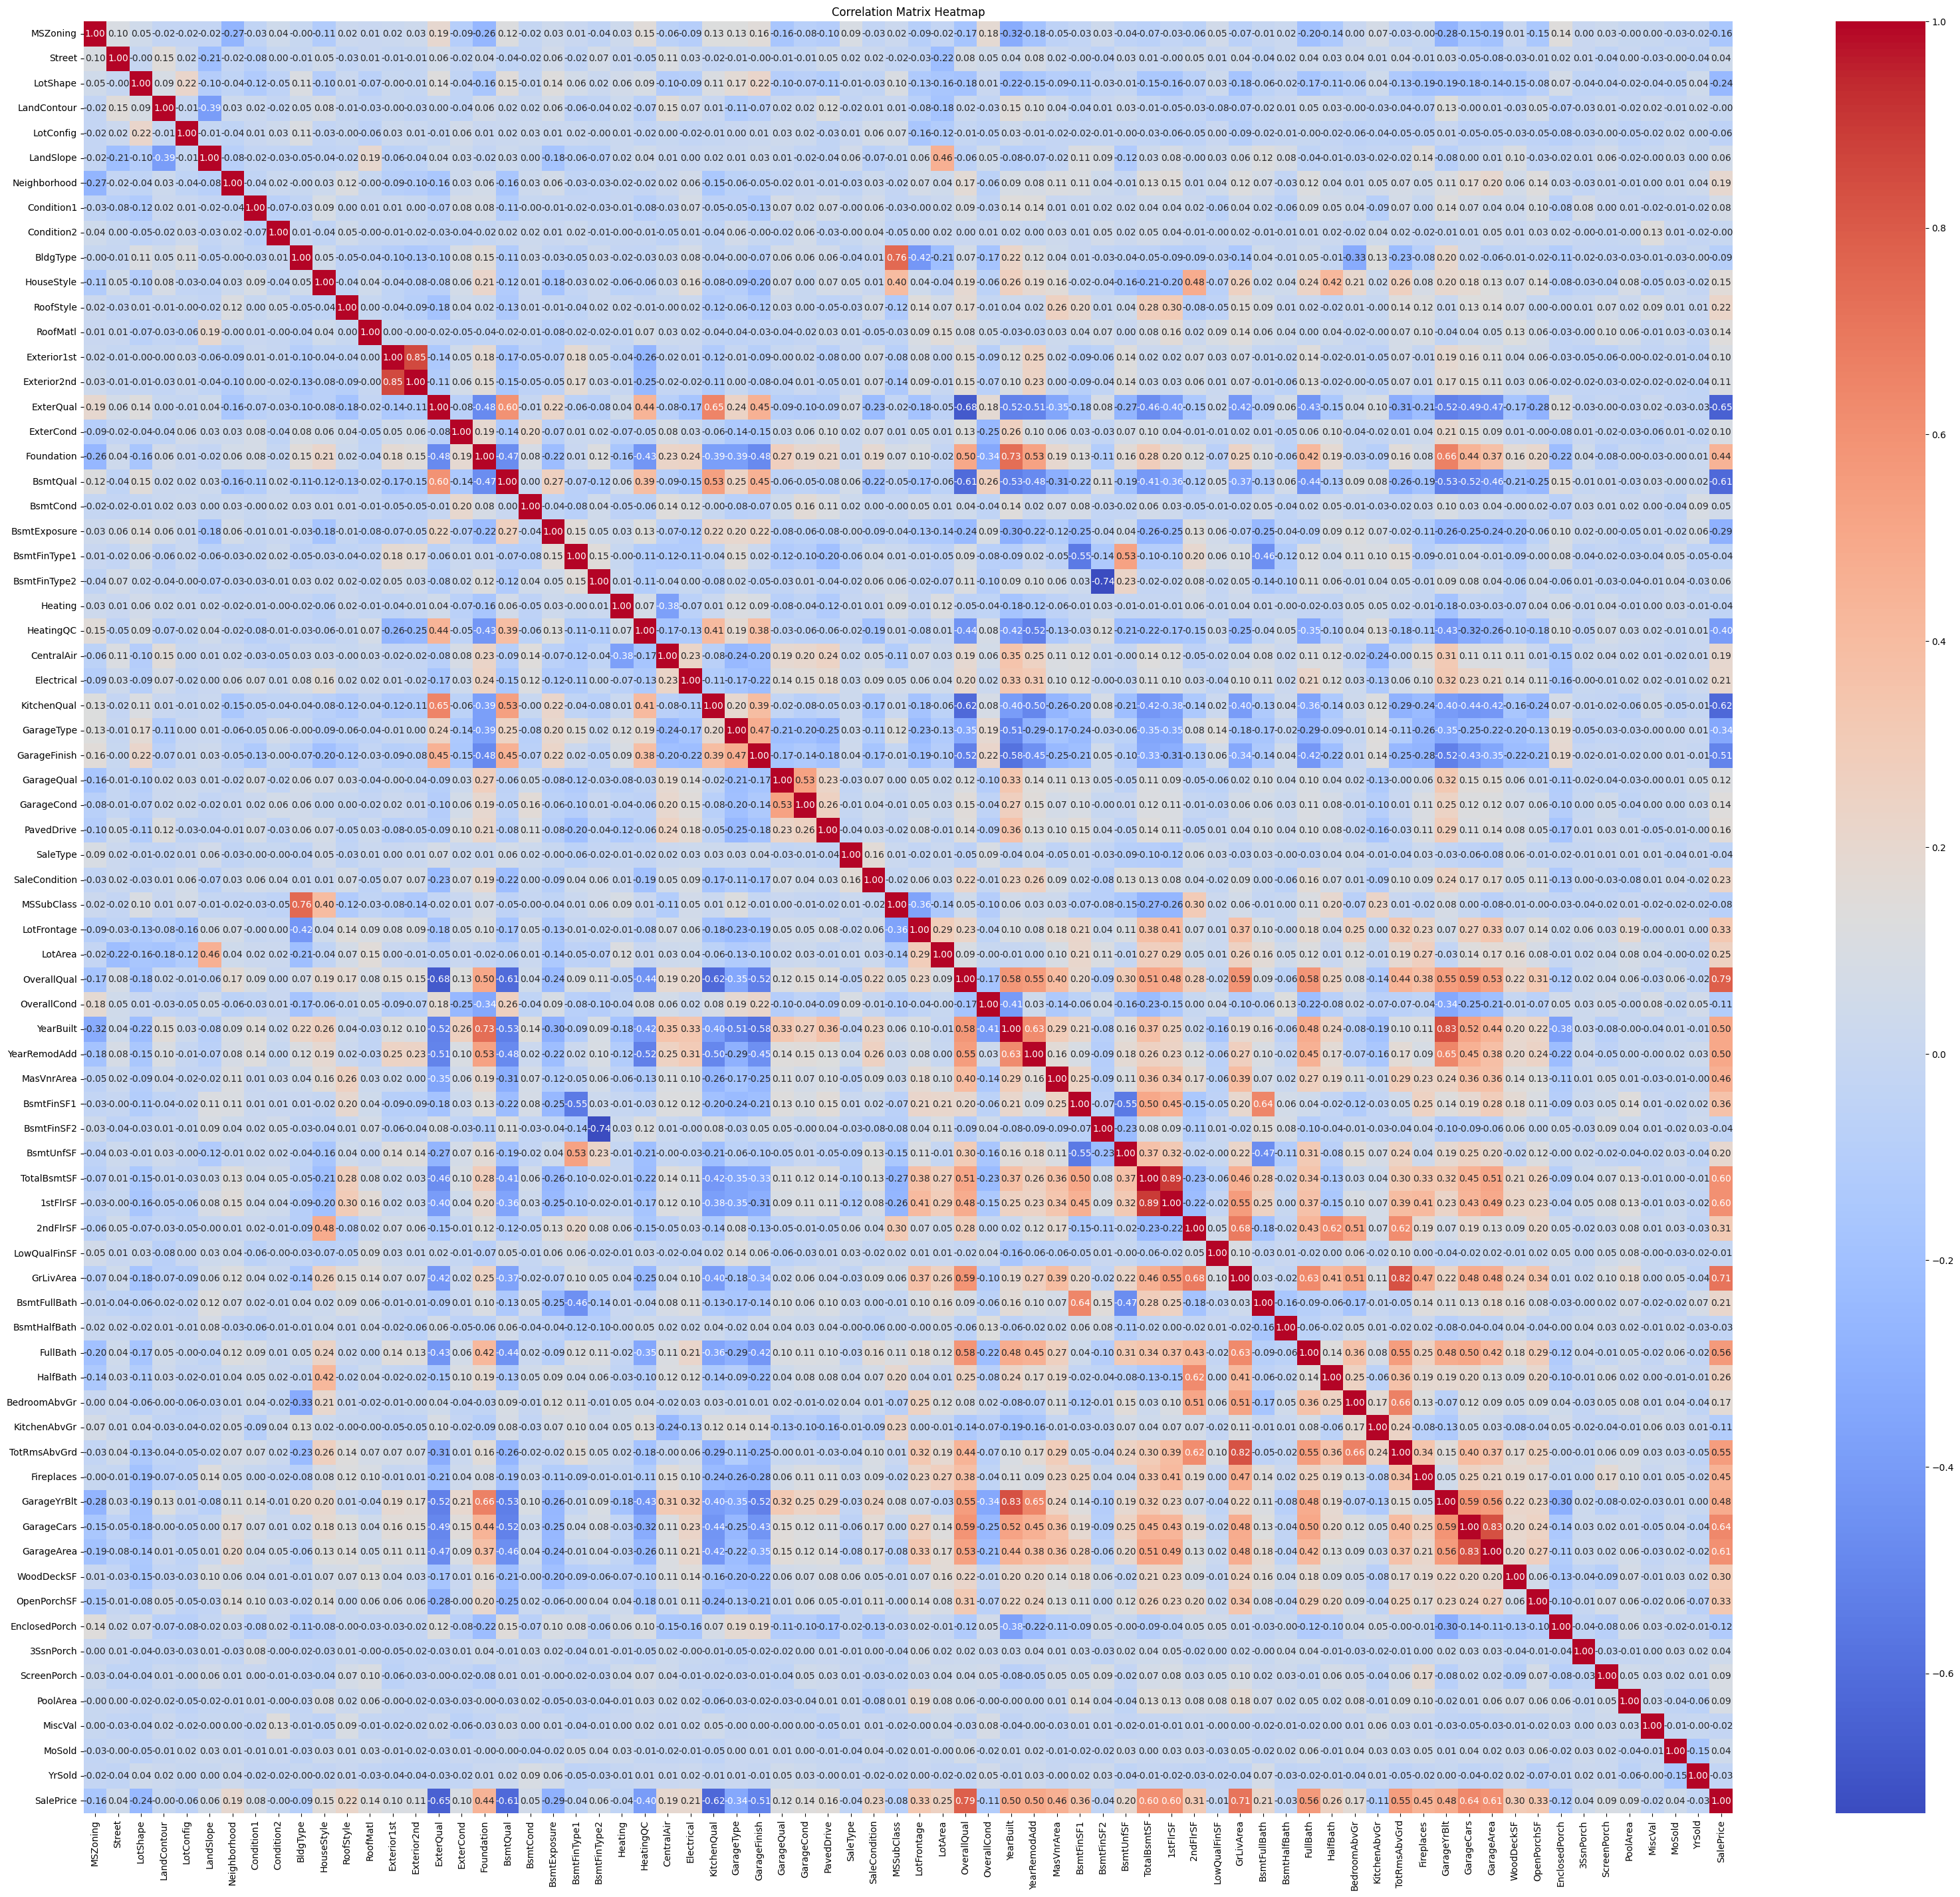

In [ ]:
numerical_features = data_train_conc.select_dtypes(include=['int64', 'float64']).columns

# Creating a correlation matrix
correlation_matrix = data_train_conc[numerical_features].corr()

# Plotting a heatmap
plt.figure(figsize=(40, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Modeling


### 4.1Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model = LR_model.fit(x_train_scaler,y_train)


In [ ]:
y_pred_val=LR_model.predict(x_val_scaler)

In [ ]:
from sklearn.metrics import r2_score ,mean_squared_error ,mean_absolute_error

MSE = mean_squared_error(y_val,y_pred_val)
RMSE = np.sqrt(mean_squared_error(y_val, y_pred_val))
MAE=mean_absolute_error(y_val, y_pred_val)
rsq = r2_score(y_val,y_pred_val)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)


mean squared error : 1310758619.9870458
Root mean squared error : 36204.40056107884
mean absolute error : 21453.218443115038
r square : 0.8021105587739148


In [ ]:
y_pred_test = LR_model.predict(x_test_scaler)

In [ ]:
MSE = mean_squared_error(y_test,y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE=mean_absolute_error(y_test, y_pred_test)
rsq = r2_score(y_test,y_pred_test)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 4928380837.071972
Root mean squared error : 70202.42757249903
mean absolute error : 53890.064651455614
r square : -18.46708926696911


### 4.2 XGBRegressor

In [ ]:
#using the Gridsearch to best parmeters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
}


In [ ]:
from xgboost import XGBRFRegressor

xgb_model = XGBRFRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300)

xgb_model = xgb_model.fit(x_train_scaler,y_train)

In [ ]:
y_pred_val = xgb_model.predict(x_val_scaler)

In [ ]:
MSE = mean_squared_error(y_val, y_pred_val)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_val, y_pred_val)
rsq = r2_score(y_val, y_pred_val)

# Print the metrics
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MAE)
print('R-squared:', rsq)

Mean Squared Error: 1310758619.9870458
Root Mean Squared Error: 36204.40056107884
Mean Absolute Error: 21453.218443115038
R-squared: 0.8021105587739148


In [ ]:
y_pred_test = xgb_model.predict(x_test_scaler)

In [ ]:
MSE = mean_squared_error(y_test, y_pred_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred_test)
rsq = r2_score(y_test, y_pred_test)

# Print the metrics
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MAE)
print('R-squared:', rsq)

Mean Squared Error: 309877234.0096989
Root Mean Squared Error: 17603.33019657641
Mean Absolute Error: 13236.509465409366
R-squared: -0.22401412871579796


### 4.3 Support Vector Regression


In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model = svr_model.fit(x_train_scaler ,y_train)

In [ ]:
y_pred_val = svr_model.predict(x_val_scaler)

In [ ]:
MSE = mean_squared_error(y_val, y_pred_val)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_val, y_pred_val)
rsq = r2_score(y_val, y_pred_val)


print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MAE)
print('R-squared:', rsq)

Mean Squared Error: 6053595829.391124
Root Mean Squared Error: 77804.85736373485
Mean Absolute Error: 51304.3615525171
R-squared: 0.08606918328058832


In [ ]:
y_pred_test = svr_model.predict(x_test_scaler)

In [ ]:
MSE = mean_squared_error(y_test, y_pred_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred_test)
rsq = r2_score(y_test, y_pred_test)

print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MAE)
print('R-squared:', rsq)

Mean Squared Error: 349799440.6264721
Root Mean Squared Error: 18702.925991044078
Mean Absolute Error: 14715.999693142521
R-squared: -0.38170672302529884
